In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 

data = pd.read_csv('data2.csv')
data.info()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12988\1143377019.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data2.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698672 entries, 0 to 698671
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           698672 non-null  object 
 1   Date Rptd       698668 non-null  object 
 2   DATE OCC        698668 non-null  object 
 3   TIME OCC        698667 non-null  float64
 4   AREA            698667 non-null  float64
 5   AREA NAME       698667 non-null  object 
 6   Rpt Dist No     698667 non-null  float64
 7   Part 1-2        698667 non-null  float64
 8   Crm Cd          698667 non-null  float64
 9   Crm Cd Desc     698667 non-null  object 
 10  Mocodes         602604 non-null  object 
 11  Vict Age        698667 non-null  float64
 12  Vict Sex        607450 non-null  object 
 13  Vict Descent    607446 non-null  object 
 14  Premis Cd       698658 non-null  float64
 15  Premis Desc     698301 non-null  object 
 16  Weapon Used Cd  242948 non-null  float64
 17  Weapon Des

In [3]:
#This function will get the unique values in the column and find the total times they pop up
def colum_data(dataset, col):
    return dataset[col].value_counts().reset_index(name = 'Cases')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Central'),
  Text(1, 0, '77th Street'),
  Text(2, 0, 'Pacific'),
  Text(3, 0, 'Southwest'),
  Text(4, 0, 'Hollywood'),
  Text(5, 0, 'Southeast'),
  Text(6, 0, 'Olympic'),
  Text(7, 0, 'N Hollywood'),
  Text(8, 0, 'Newton'),
  Text(9, 0, 'Wilshire'),
  Text(10, 0, 'Rampart'),
  Text(11, 0, 'West LA'),
  Text(12, 0, 'Northeast'),
  Text(13, 0, 'Van Nuys'),
  Text(14, 0, 'West Valley'),
  Text(15, 0, 'Harbor'),
  Text(16, 0, 'Topanga'),
  Text(17, 0, 'Devonshire'),
  Text(18, 0, 'Mission'),
  Text(19, 0, 'Hollenbeck'),
  Text(20, 0, 'Foothill')])

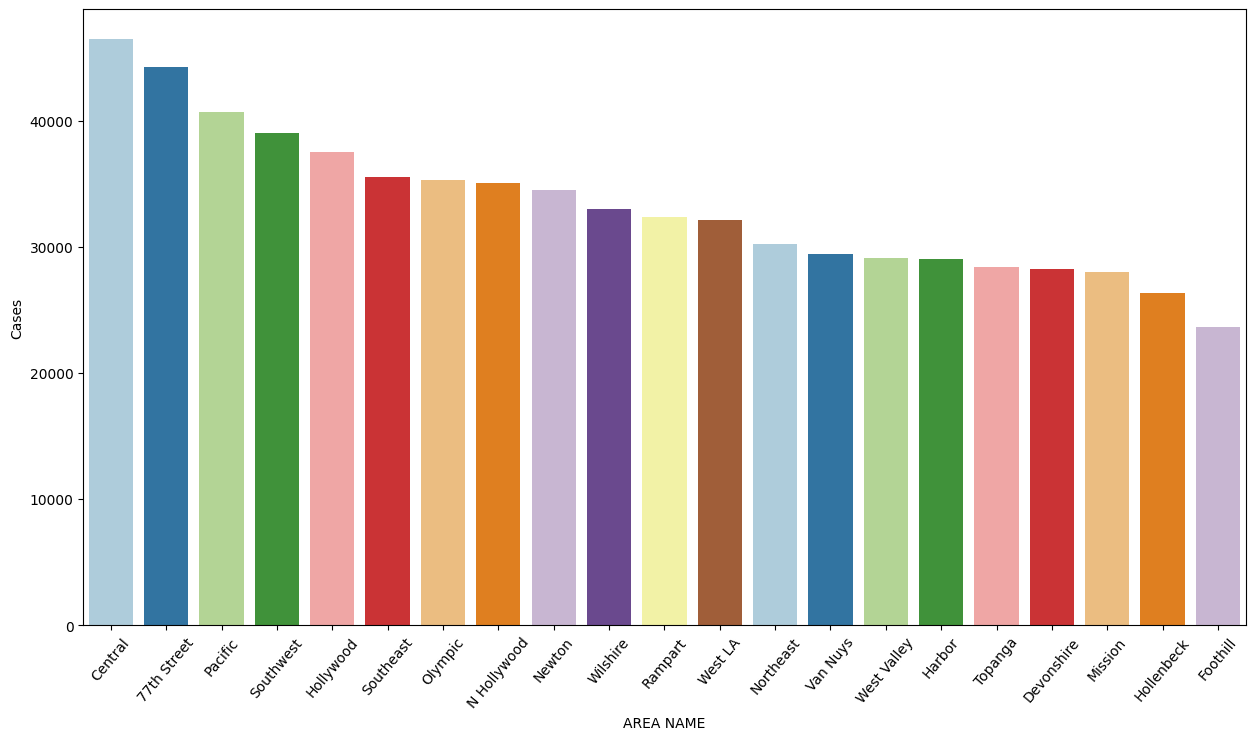

In [4]:
#Lets see which area has the most cases popped up
area_crime= colum_data(data, 'AREA NAME')
sorted_area = area_crime.sort_values(by = 'Cases', ascending= False)

plt.figure(figsize= (15, 8))
sns.barplot(x = 'AREA NAME', y = 'Cases', data = sorted_area, hue = 'AREA NAME', palette= 'Paired')
plt.xticks(rotation = 50)

Here we can see that Central and 77th Street has the most amount of crime incidents, but we need to dig a little deeper and see which crime is the most prevelant on these areas

<Axes: xlabel='Case', ylabel='Type of Crime'>

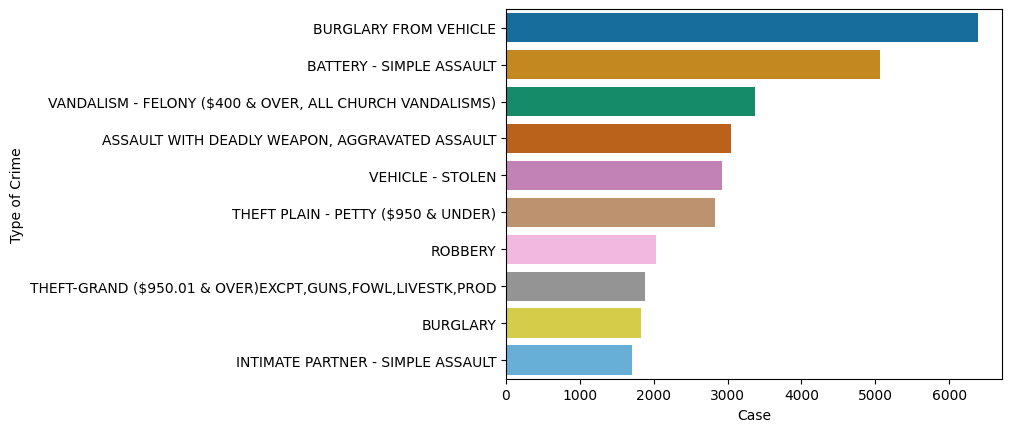

In [5]:
#WWhat is the most crime commited on Central street
def street_crimes(dataset, street):
    street_data = dataset.loc[dataset['AREA NAME'] == street]
    street_crime = street_data.groupby(street_data['Crm Cd Desc']).size().reset_index(name = 'Case')
    street_most = street_crime.sort_values(by = 'Case', ascending = False)
    street_mostcrime = street_most.head(10)
    street_plot = sns.barplot(x = 'Case', y = 'Crm Cd Desc', data = street_mostcrime, hue = 'Crm Cd Desc', palette= 'colorblind')
    plt.ylabel('Type of Crime')
    return street_plot
street_crimes(data, 'Central')
#Looks like Burglary from vehicle is the most commited crime on Central street 

<Axes: xlabel='Case', ylabel='Type of Crime'>

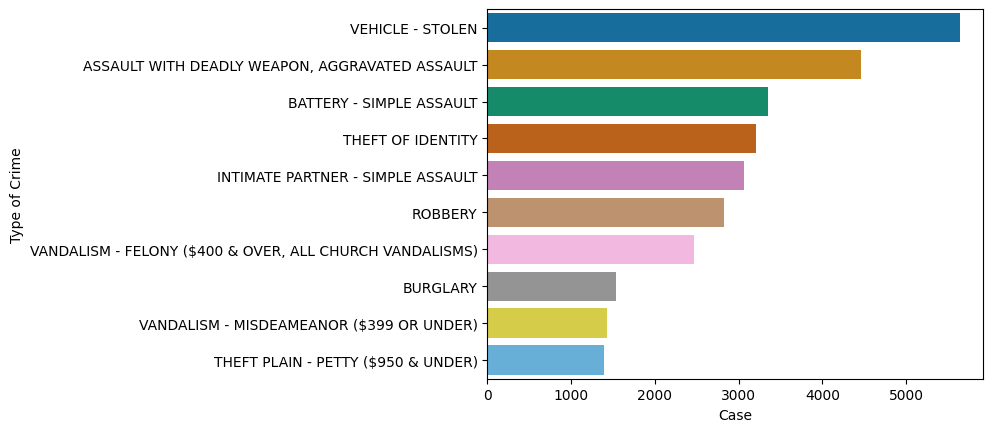

In [6]:
#What about 77th Street
street_crimes(data, '77th Street')
#While on 77th street the vehicle stolen is the most commited crime 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '77th Street'),
  Text(1, 0, 'Southwest'),
  Text(2, 0, 'Southeast'),
  Text(3, 0, 'N Hollywood'),
  Text(4, 0, 'West LA'),
  Text(5, 0, 'Devonshire'),
  Text(6, 0, 'Topanga'),
  Text(7, 0, 'West Valley'),
  Text(8, 0, 'Van Nuys'),
  Text(9, 0, 'Mission'),
  Text(10, 0, 'Rampart'),
  Text(11, 0, 'Pacific'),
  Text(12, 0, 'Foothill'),
  Text(13, 0, 'Hollywood'),
  Text(14, 0, 'Wilshire'),
  Text(15, 0, 'Newton'),
  Text(16, 0, 'Olympic'),
  Text(17, 0, 'Northeast'),
  Text(18, 0, 'Hollenbeck'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Harbor')])

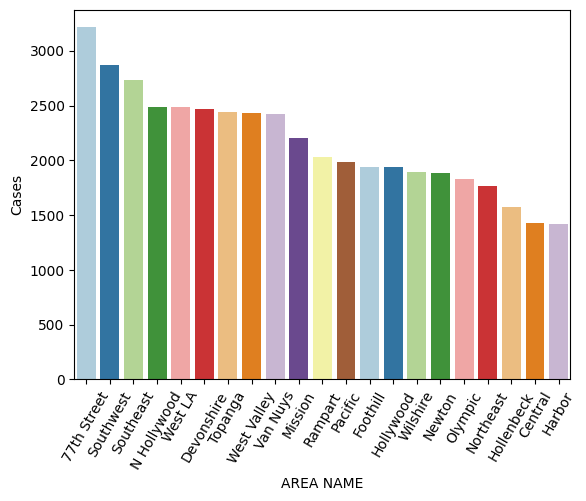

In [7]:
#Something that caught my eye is theft of identity 
#So lets focus on identity theft in Los Angeles 
theft_data = data.loc[data['Crm Cd Desc'] == 'THEFT OF IDENTITY']

#Where do most identity thefts occur 
theft_area = colum_data(theft_data, 'AREA NAME')
sns.barplot(x = 'AREA NAME', y = 'Cases', data = theft_area, hue = 'AREA NAME',  palette= 'Paired')
plt.xticks(rotation = 60)
#We see that 77th Street has the most cases for theft identity 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12988\554520909.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  theft_data['years'] = pd.to_datetime(theft_data['DATE OCC'], errors='coerce')
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12988\554520909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  theft_data['years'] = pd.to_datetime(theft_data['DATE OCC'], errors='coerce')


<Axes: xlabel='years'>

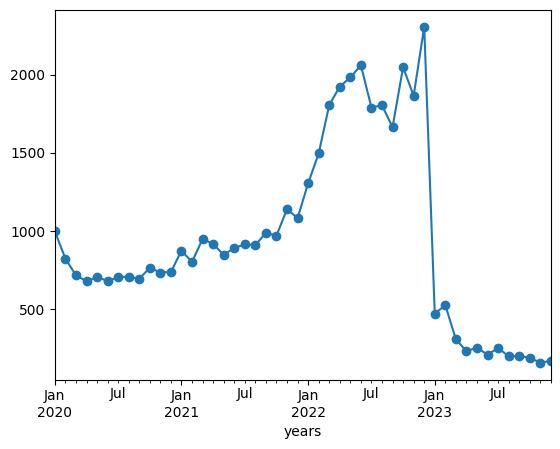

In [8]:
theft_data['years'] = pd.to_datetime(theft_data['DATE OCC'], errors='coerce')
theft_overtime = theft_data['years'].dt.to_period('M').value_counts().sort_index()
theft_overtime.plot(kind='line', marker='o')

<Axes: xlabel='Cases', ylabel='Status'>

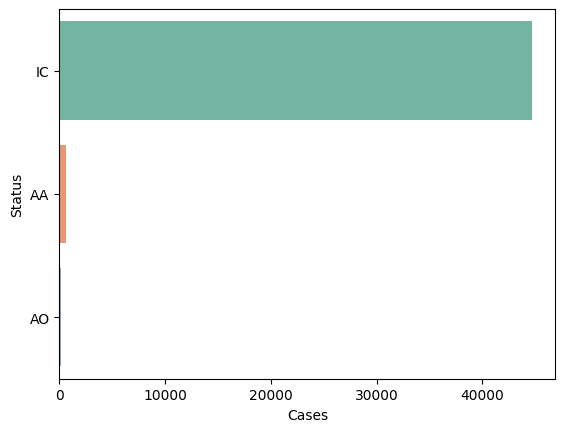

In [9]:
status_data = colum_data(theft_data, 'Status')
sns.barplot(x = 'Cases', y = 'Status', data = status_data, hue = 'Status', palette = 'Set2')
#Here we can see that a great vast majority of the investigations are still ongoing

<Axes: xlabel='Vict Descent', ylabel='Cases'>

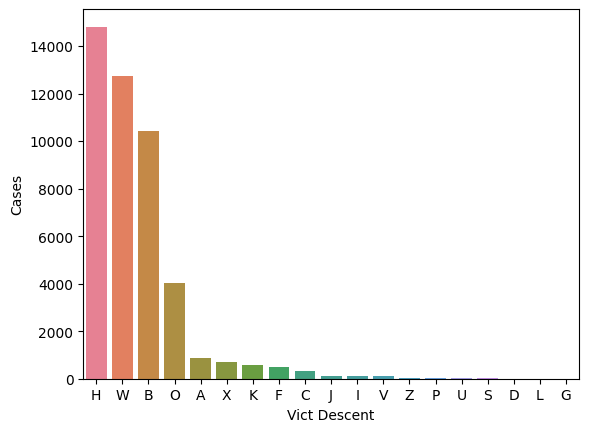

In [10]:
#Lets see the victims descent/origin
descent_theft = colum_data(theft_data, 'Vict Descent')
sns.barplot(x = 'Vict Descent', y = 'Cases', data = descent_theft, hue = 'Vict Descent', palette= 'husl')

(0.0, 8000.0)

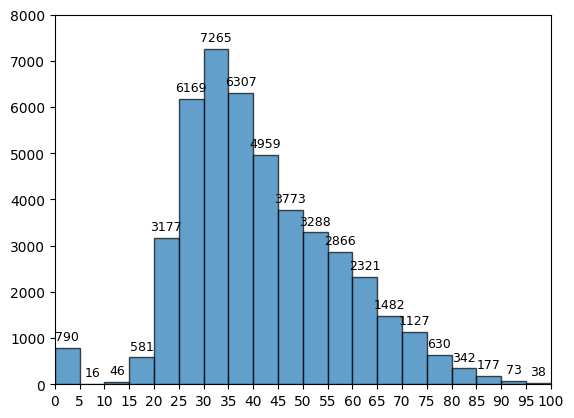

In [11]:
import numpy as np

#Lets find the age of the victims to these identity thefts and their gender
hist, bins, _ = plt.hist(theft_data['Vict Age'], edgecolor='k', alpha=0.7, bins = np.arange(0, 101, 5))

for i in range(len(bins) - 1):
    plt.text(bins[i] + 2.5, hist[i] + 100, str(int(hist[i])), fontsize = 9, ha ='center', va = 'bottom')

plt.xticks(np.arange(0, 101, 5))
plt.xlim(0, 100)
plt.ylim(0, 8000)

Here we can see that majority of the victims are around 25-40 years old which makes sense because this age group is the one with the most personal information on the internet. Personal information can be stolen through many ways, but one of the most common for this age group would be credit card fraud or Phishing. 

([<matplotlib.patches.Wedge at 0x2a4c185dca0>,
 [Text(-0.24783463727999708, 1.0717173100049717, 'F'),
  Text(0.20674396637710174, -1.0803966551071251, 'M'),
  Text(1.0991983081171568, -0.041989039431501465, 'X')],
 [Text(-0.13518252942545295, 0.58457307818453, '57.2%'),
  Text(0.11276943620569184, -0.5893072664220681, '41.6%'),
  Text(0.5995627135184491, -0.022903112417182615, '1.2%')])

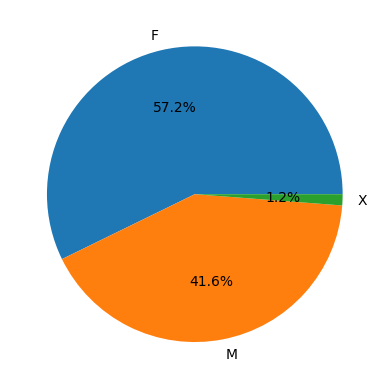

In [12]:
import numpy as np

#To find which gender is the most suspectible to identity theft 
theft_genders = theft_data.loc[theft_data['Vict Sex'] != 'H'] 
gender_split = theft_genders['Vict Sex'].value_counts()
plt.pie(gender_split, labels = gender_split.index, autopct= '%1.1f%%' )


Overall, we see that Central is the area with the most crime incidents while 77th Street is the one with the most identity theft committed. Majority of the victims were classified as Hispanic and White which makes sense since people of Hispanic or Latino origin make up around [48.6%](https://www.census.gov/quickfacts/fact/table/losangelescountycalifornia/BZA210217) and the White making up around [69.6%](https://www.census.gov/quickfacts/fact/table/losangelescountycalifornia/BZA210217). Something that caughty me eye is that even though the Black community make up only around [9.0%](https://www.census.gov/quickfacts/fact/table/losangelescountycalifornia/BZA210217), they are the 3rd highest victims, prompting some more further investigations needed.

With a great number of the victims fall at around the 25 - 40 age range with 57.2% being female and  majority of these identity theft incidents are still left unsolved and investigations still ongoing.

An interesting note is that overtime identity theft has drastically decreased from 2023 and onward which can be contributed to people becoming more aware of phishing calls/emails and more security such as 2FA becoming more relevant.
Another contribution could be the advancment of ai and speech ai used by identity theieves resulting in people not even knowing their personal information is being stolen, resulting in less reports to come in as identity theft. 